In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from matplotlib import pyplot as plt
from sklearn import tree
import numpy
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**data1 contains missing values and data is after knn imputation(with out any missing values)**

In [5]:
#data1 contains missing values and data is after knn imputation
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetics_knn_imputer_with_label.csv", delimiter=",")
data1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetics_with_missing_values.csv", delimiter=",")

#Description of dataset
Here all attributes’ count, minimum, maximum values, and other information have been displayed.

**Dataset description with missing values**

In [6]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,657.0,4.494673,3.217291,1.000,2.00000,4.0000,7.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,732.0,72.405738,12.390616,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabtsPFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Dataset description without missing vaues**

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,4.417081,3.034070,1.000,2.00000,4.000000,6.000000,17.00
Glucose,768.0,121.611469,30.495093,44.000,99.00000,117.000000,140.250000,199.00
BloodPressure,768.0,72.371507,12.200302,24.000,64.00000,72.000000,80.000000,122.00
SkinThickness,768.0,29.062651,9.330646,7.000,23.00000,29.000000,34.912326,99.00
Insulin,768.0,152.786421,96.979311,14.000,88.00000,134.760633,190.996218,846.00
BMI,768.0,32.444675,6.885439,18.200,27.50000,32.300000,36.600000,67.10
DiabtsPFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [8]:
#pip install missingno

In [9]:
import missingno as msno

#Representation of missing values

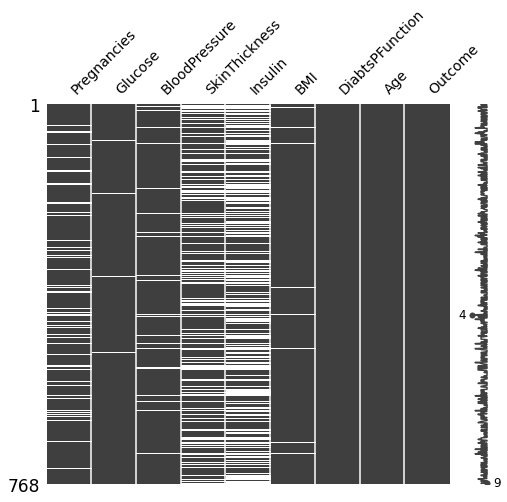

In [10]:
filtered_data = msno.nullity_filter(data1, filter='bottom', n=8, p=0.999) # or filter='top'
#msno.matrix(filtered_data.sample(768))
msno.matrix(data1,fontsize=14,figsize = (8,7))


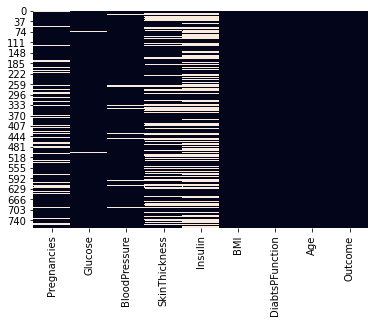

In [11]:
sns.heatmap(data1.isnull(), cbar=False)

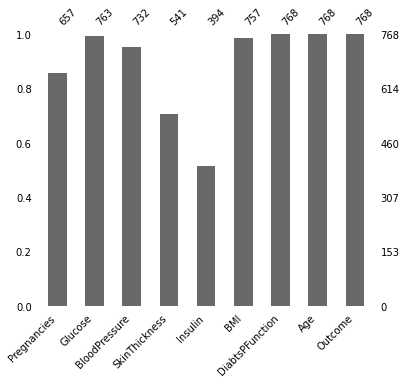

In [12]:
import missingno as msno
p=msno.bar(data1,fontsize=10,figsize = (6,5))

#After imputation
**K-nearest neighbor model has been used for imputation.**

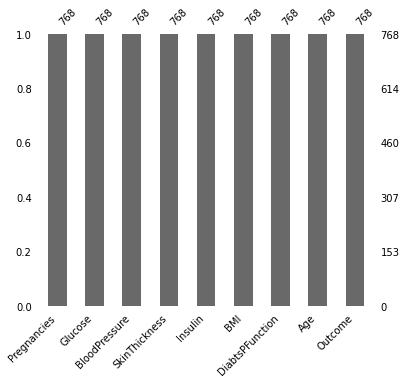

In [13]:
import missingno as msno
p=msno.bar(data,fontsize=10,figsize = (6,5))

#Histogram of all features

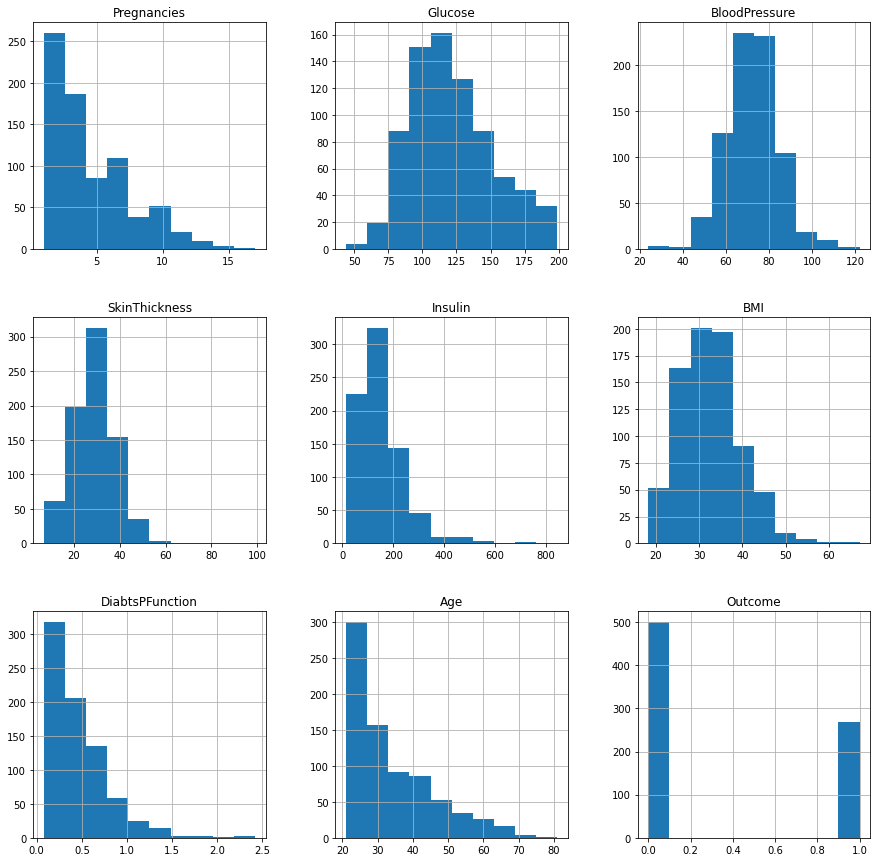

In [14]:
p = data.hist(figsize = (15,15))

#Feature extraction
Feature extraction is the process of reducing the number of attributes in a dataset. Irrelevant features that tend to increase the model's accuracy are reduced[1].

**Using extra tree classifier**



[0.10217491 0.23205804 0.08809062 0.10012821 0.1274053  0.12278595
 0.1068508  0.12050617]


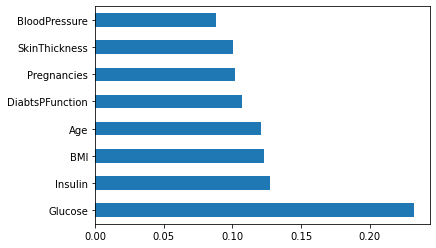

In [16]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

X = data.iloc[:,0:8]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

**`Using chi square test`**

The top significant features were selected using the chi-square test. It selects the features that have the best connection with output[2].

In [20]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.iloc[:,0:8]  #independent columns
y = data.iloc[:,8]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(13,'Score'))  #print 10 best features

             Specs        Score
4          Insulin  4958.527390
1          Glucose  1443.809168
7              Age   181.303689
3    SkinThickness   175.670426
5              BMI   110.709057
0      Pregnancies   101.664014
2    BloodPressure    49.491262
6  DiabtsPFunction     5.392682


[0.10469224 0.22173382 0.08555313 0.10225964 0.12496164 0.12785743
 0.10835861 0.12458349]


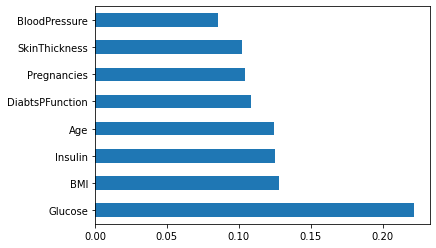

In [23]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

X = data.iloc[:,0:8]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()